
# Project: Tmdb movie data set analysis
Naveen A Mohanan 19/3/2018

**Linkedin:**[Naveen A M](https://www.linkedin.com/in/naveen-am)*(www.linkedin.com/in/naveen-am)*

**Email:**naveen.am@yahoo.com

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over 100 millions to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be a commercial success?

## Questions
How certain criteria effects the commercial success of the films,how some factor like the budget,popularity and company can influence the total revenue what can we predict about the commercial success before it is released based on these factors.


In [1]:
#import essential packages 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling


### **ACQUIRING AND CLEANING THE DATA** 

### Acquiring 
2 different data set has been acquired. First data set is provided by Udacity as udacity nano degree program .**File name :** *"tmdb-movies.csv"*.

Second one downloaded from kaggele,which is TMDB 5000 Movie Dataset Metadata on ~5,000 movies  (last updated oct 2017) *Link*:https://www.kaggle.com/tmdb/tmdb-movie-metadata  **File names :** *"tmdb_5000_movies.csv" & "tmdb_5000_credits".csv*

**{**
**NewColumns added:**homepage,id,original_title,overview,popularity,production_companies,production_countries,release_date,spoken_languages,  status,tagline,vote_average

**Lost columns:**
    actor_1_facebook_likes,
    actor_2_facebook_likes,
    actor_3_facebook_likes,
    aspect_ratio,
    cast_total_facebook_likes,
    color,
    content_rating,
    director_facebook_likes,
    facenumber_in_poster,
    movie_facebook_likes,
    movie_imdb_link,
    num_critic_for_reviews,
    num_user_for_review**}**
    

    

### Cleaning (Loading and deciding which data set to use)

Loading first dataset provided by Udacity & inspecting

In [2]:
#Reading CSV files and printing some rows 
udacity_movie_df = pd.read_csv('data/tmdb-movies.csv')
print "Total (rows,col)=",udacity_movie_df.shape,"\nSAMPLE"
udacity_movie_df.head(2)

Total (rows,col)= (10866, 21) 
SAMPLE


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Loading second dataset provided by Kaggle & inspecting

In [3]:
#Reading CSV files and printing some rows 
new_movie_df = pd.read_csv('data/tmdb_5000_movies.csv')
print "Total (rows,col)=",new_movie_df.shape,"\nSAMPLE"
new_movie_df.head(2)

Total (rows,col)= (4803, 20) 
SAMPLE


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
#Reading CSV files and printing some rows 
new_movie_credit_df = pd.read_csv('data/tmdb_5000_credits.csv')
print "Total (rows,col)=",new_movie_credit_df.shape,"\nSAMPLE"
new_movie_credit_df.head(2)

Total (rows,col)= (4803, 4) 
SAMPLE


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


**Checking for null values** 

In [5]:
#checking for null value present in csv or not 
print udacity_movie_df.isnull().values.any()
print new_movie_df.isnull().values.any()
print new_movie_credit_df.isnull().values.any()

True
True
False


**Finding out how many values are null in each coloum in all the dataframes**

In [6]:
#finding no. of null values in first data set 
print udacity_movie_df[udacity_movie_df.columns[:]].isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [7]:
#finding no. of null values in second data set 
new_movie_df[new_movie_df.columns[:]].isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

**Because of the less number of null values and better organisation ,I would be using the new updated tmdb data set, even though it has less no of rows.**
Exploring the new dataset little more ,finding all columns datatypes

In [8]:
# Print out datatypes of second dataset 
new_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [9]:
new_movie_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**Cleaning the data, Adding  a new column profit**
(revenue - budget) 

In [10]:
#Creating a new dataset and adding the required field "Profit"
cleaned_data = pd.DataFrame()
cleaned_data['id'] = new_movie_df['id']
cleaned_data['Profit'] = (new_movie_df['revenue'] - new_movie_df['budget'])
cleaned_data = cleaned_data.merge(new_movie_df,on='id')
cleaned_data.head(3)
#New cleaned_dataset looks correct 

,id,Profit,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,2550965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,661000000,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,635674609,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What can we say about the commercial success of the film by looking at the budget?

### Research Question 2 :What can we say about the commercial success of the film by looking at the popularity?



>### **Top 10 commercial success films** 

In [11]:
#Creating the new dataset top_10_profit for analysis sorting in desc. order & trimming for top 10 rows only
top_10_profit = cleaned_data.sort_values(by='Profit',ascending = False)
top_10_profit = top_10_profit.head(10)
top_10_profit.head(3)

,id,Profit,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,2550965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,597,1645034188,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
28,135397,1363528810,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662


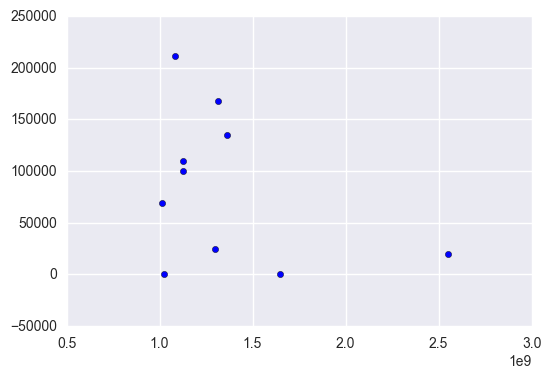

In [12]:
#Plotting scatter plot for top 10 movies 
data_groupby_ratings = top_10_profit.groupby(['Profit','id'])
plt.scatter(top_10_profit['Profit'],top_10_profit['id'])

Below are some functions used to help in exploration

In [13]:
#function to print Mean,STD,Min,Max& plot histogram 
# pass arduments (dataframe,attribute:to calculate on ,std_ddof_value(for population/sample))
def describe_one_col(dataframe,attribute,std_ddof_value,hist_title):
    print 'Mean:', dataframe[attribute].mean()
    print 'Standard deviation:', dataframe[attribute].std(ddof = std_ddof_value)
    print 'Minimum:', dataframe[attribute].min()
    print 'Maximum:', dataframe[attribute].max()
    plt.title(hist_title)
    plt.xlabel(attribute)
    plt.hist(dataframe[attribute])


### 1.Analysing the effect of budget on the profit.

>#### Analysing the budget of top 10 profitable vs complete dataset

In [14]:
#Creating a reffernce pointer
bud_analysis = top_10_profit

Budget analysis of top 10 profitable flims
Mean: 179500000.0
Standard deviation: 63402155.589
Minimum: 74000000
Maximum: 280000000


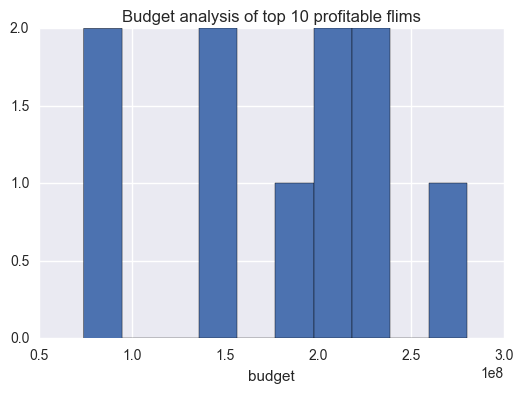

In [15]:
#Calling function for budget analysis on top 10 
title = 'Budget analysis of top 10 profitable flims'
print title
describe_one_col(bud_analysis,'budget',1,title)

Budget analysis of all the flims
Mean: 29045039.8753
Standard deviation: 40718151.7717
Minimum: 0
Maximum: 380000000


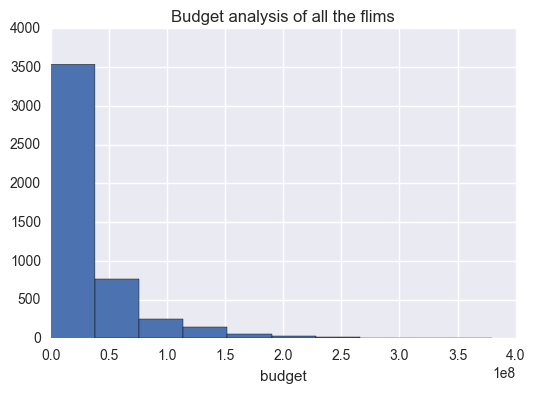

In [16]:
#Calling function for budget analysis on complete dataset
title = 'Budget analysis of all the flims'
print title
describe_one_col(cleaned_data,'budget',0,title)

An observation could be made that top 10 profitable flims have a avgerage budget a lot higher(179,500,000.0 > 29,045,039.8753) than normal, to prove its statistical significance we perform a one sample t test in +ve direction

>**Null hypothesis($H_0$)**: There is no significant change 

>**Alternate hypothesis($H_A$)**: mean of the budget grater than or equal 179,500,000.0 are more likely to succeed

>>$\normalsize {H_0 : \mu_b  {<}  179,500,000.0} $

>>$\normalsize {H_A : \mu_b  {\geq}  179,500,000.0} $

>($\mu_b=$ mean of the budget )

>** Establish a statistical test**: A one tailed test in the +ve(positive) direction. 

Sample size**(n)**=10, degree of freedom**(df)**=9, Direction = +ve, $\alpha$ = .05, 

t-critical value= 1.83313, Standard derivation of sample **(S)**= 63402155.589,Standard error**(SE)** = $\frac{S}{\sqrt{n}}$ =21134051.863

t-statistics = $\normalsize{\frac{\bar x_b - \mu_{b}}{SE}}$ =7.11907
# Results
Result statistically significant: **Yes** (t-value significantly grater than  t-critical)(7.11907>1.83313)  
>Reject the Null Hypothesis($H_0$)  

Margin of error for 95% Critical interval=$(t-critical*SE)$= 38741464.49162119, Confidence Interval = (140758535.50837881 to 218241464.49162119)

### 2.Analysing the effect of Popularity on the profit.

>#### Analysing the popularity of top 10 profitable vs complete dataset

In [17]:
#Creating a reffernce pointer
pop_analysis = top_10_profit

Popularity analysis of top 10 profitable flims:

Mean: 229.224119
Standard deviation: 246.556429638
Minimum: 77.68208
Maximum: 875.581305


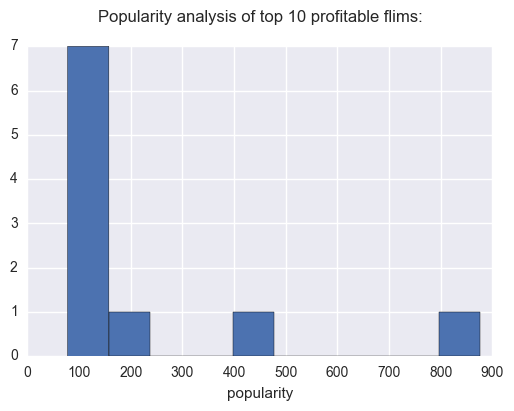

In [18]:
#Calling function for Poplution analysis on top 10 
title = 'Popularity analysis of top 10 profitable flims:\n'
print title
describe_one_col(pop_analysis,'popularity',1,title)

Popularity analysis of all the flims
Mean: 21.4923005882
Standard deviation: 31.8133374129
Minimum: 0.0
Maximum: 875.581305


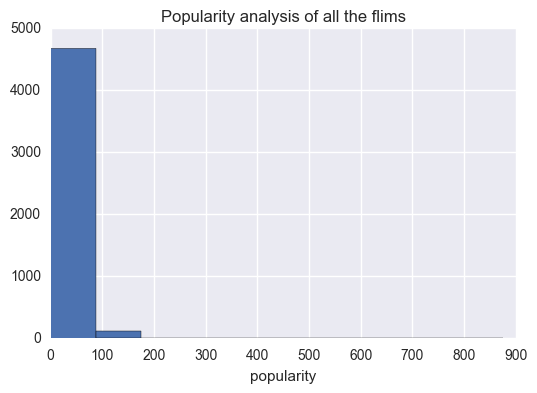

In [19]:
#Calling function for Poplution analysis on complete dataset
title = 'Popularity analysis of all the flims'
print title
describe_one_col(cleaned_data,'popularity',0,title)

An observation could be made that top 10 profitable flims have a avgerage popularity a lot higher(229.224119 > 21.4923005882) than normal, to prove its statistical significance we perform a one sample t test in +ve direction

>**Null hypothesis($H_0$)**: There is no significant change 

>**Alternate hypothesis($H_A$)**: mean of the popularity grater than or equal 229.224119 are more likely to succeed

>>$\normalsize {H_0 : \mu_p  {<}  229.224119} $

>>$\normalsize {H_A : \mu_p  {\geq}  229.224119} $

>($\mu_p=$ mean of the popularity )

>** Establish a statistical test**: A one tailed test in the +ve(positive) direction. 

Sample size**(n)**=10, degree of freedom**(df)**=9, Direction = +ve, $\alpha$ = .05, 

t-critical value= 1.83313, Standard derivation of sample **(S)**= 246.556429638,Standard error**(SE)** = $\frac{S}{\sqrt{n}}$ =82.185476546

t-statistics = $\normalsize{\frac{\bar x_p - \mu_{p}}{SE}}$ =2.5275976
# Results
Result statistically significant: **Yes** (t-value significantly grater than  t-critical)(2.5275976>1.83313)  
>Reject the Null Hypothesis($H_0$)  

Margin of error for 95% Critical interval=$(t-critical*SE)$= 150.656662, Confidence Interval = (379.880781 to 78.567457)

 ### Limitations
 The dataset used for the analysis is very small around 5000 where in reality there are tens of thousands of films available because of which if added substancial amount of data it can prove this analysis wrong.
 There might be some inter-depedencies between the attributes which may require further investigation.

<a id='conclusions'></a>
## Conclusions

From the above observations and statistical test, we can conclude that by looking at the factors like Budget and Popularity predictions wether the flim will be a commercial success or not can be made.If we add another film in our 5000 movie dataset we can easy predict its commercial success by looking at its budget & popularity parameter.If budget parameters happens to be grater than (179,500,000.0) & population parameter happens to be grater than (230) then we can make a strong case that the movie will be a commercial success.